In [1]:
import numpy as np

In [2]:
N_x, N_y = 800, 600
a_p = 310.3
y0, y1 = 205, 371

In [3]:
X_ind, Y_ind = np.indices((N_x,N_y))

In [4]:
img = np.exp(-np.square(0.01*(X_ind-a_p))) * (np.exp(-np.square((0.01*(Y_ind-y0)))))

In [5]:
import matplotlib.pyplot as plt

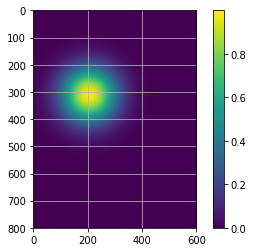

In [6]:
fig, ax = plt.subplots()
mat = ax.imshow(img)
cb = fig.colorbar(mat, ax=ax)

# DO!

In [7]:
a_guess = 300
d = 75

In [8]:
a_arr = np.arange(a_guess-d,a_guess+d+1)

In [9]:
delta_x = 2

A = img[a_arr+delta_x,y0] - img[a_arr-delta_x,y0]

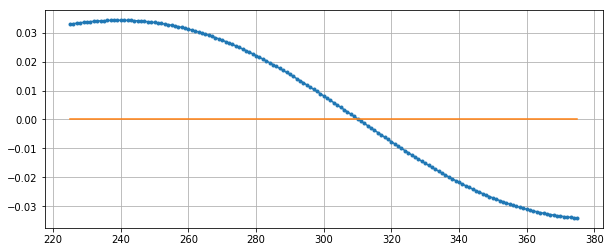

In [13]:
figa, axa = plt.subplots(figsize=(10,4))
# axa.semilogy(a_arr, A)
axa.plot(a_arr, A, '.-')
axa.plot(a_arr[[0,-1]],[0,0])

In [11]:
# figa.savefig("A-test.png")